In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
%matplotlib inline

In [2]:
df_le = pd.read_csv('../data_preparation/label_encoded_df.zip')
df_ohe = pd.read_csv('../data_preparation/dummiefied_df.zip')

In [3]:
df_le.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,2,1,0,3,0,1


In [4]:
df_ohe.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_m,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [5]:
df_le.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.354505,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.382388,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,3.000000,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [6]:
columns = list(df_le.columns)
columns

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

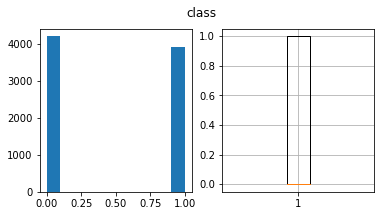

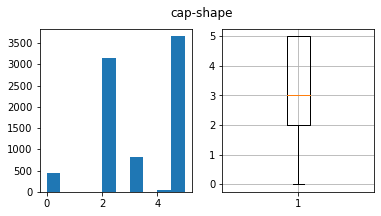

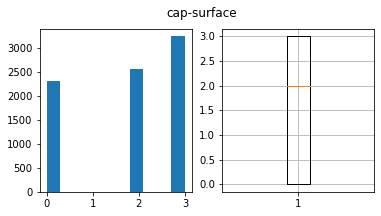

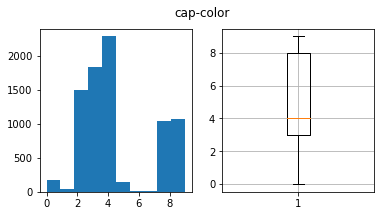

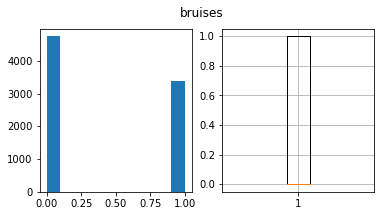

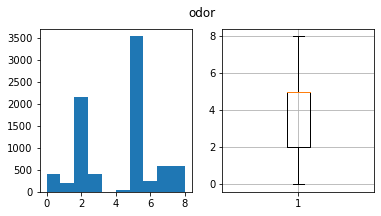

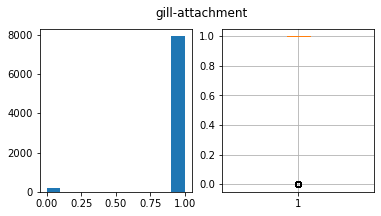

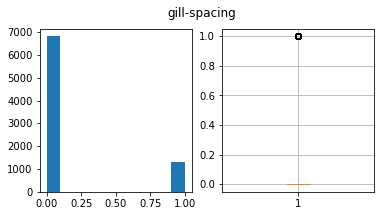

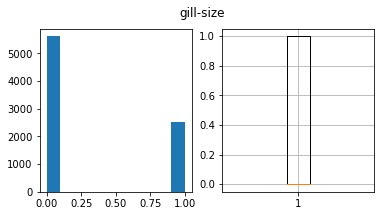

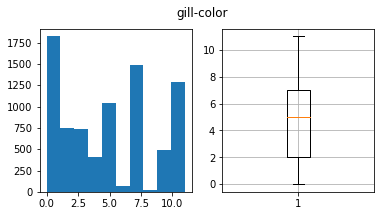

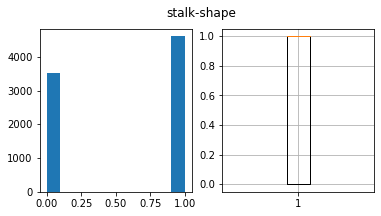

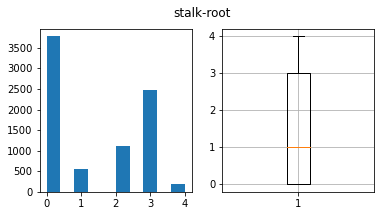

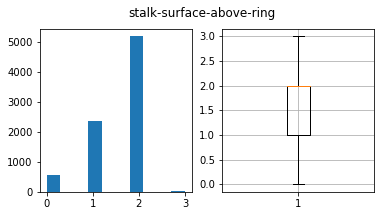

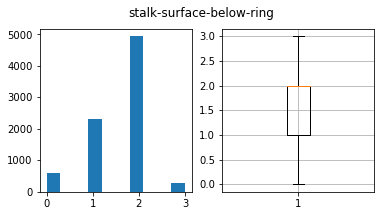

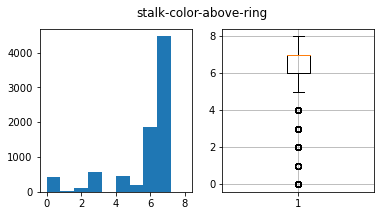

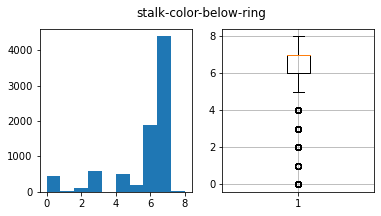

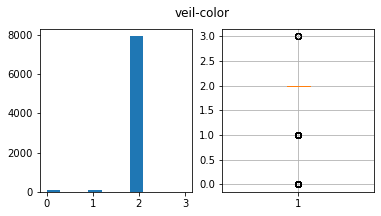

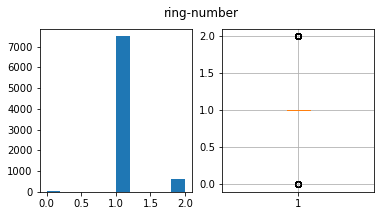

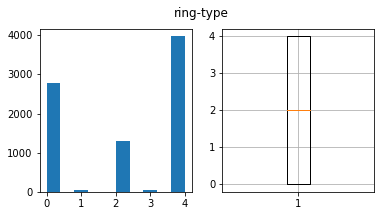

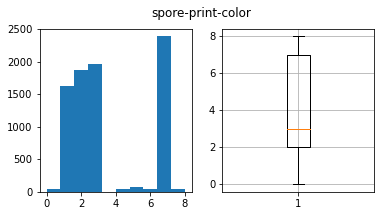

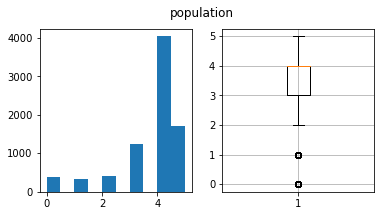

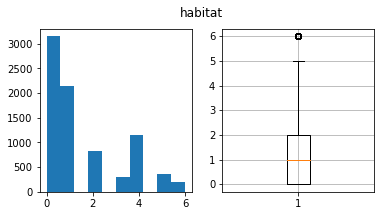

In [7]:
for col in columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
    fig.suptitle(col)
    ax1.hist(df_le[col])
    ax2.boxplot(df_le[col])
    plt.grid()
    plt.show()

In [8]:
for col in columns:
    print(f'Udzial % wartosci dla cechy {col}: \n{round(df_le[col].value_counts() / df_le.shape[0] * 100, 2)}\n')

Udzial % wartosci dla cechy class: 
0    51.8
1    48.2
Name: class, dtype: float64

Udzial % wartosci dla cechy cap-shape: 
5    45.00
2    38.80
3    10.19
0     5.56
4     0.39
1     0.05
Name: cap-shape, dtype: float64

Udzial % wartosci dla cechy cap-surface: 
3    39.93
2    31.46
0    28.56
1     0.05
Name: cap-surface, dtype: float64

Udzial % wartosci dla cechy cap-color: 
4    28.11
3    22.65
2    18.46
9    13.20
8    12.80
0     2.07
5     1.77
1     0.54
7     0.20
6     0.20
Name: cap-color, dtype: float64

Udzial % wartosci dla cechy bruises: 
0    58.44
1    41.56
Name: bruises, dtype: float64

Udzial % wartosci dla cechy odor: 
5    43.43
2    26.59
8     7.09
7     7.09
0     4.92
3     4.92
6     3.15
1     2.36
4     0.44
Name: odor, dtype: float64

Udzial % wartosci dla cechy gill-attachment: 
1    97.42
0     2.58
Name: gill-attachment, dtype: float64

Udzial % wartosci dla cechy gill-spacing: 
0    83.85
1    16.15
Name: gill-spacing, dtype: float64

Udzial % wa

In [9]:
# sprawdzenie i odrzucenie wartosci stalych/quasi-stalych (90% obserwacji stalych)

selector = VarianceThreshold(threshold=0.1)
selector.fit_transform(df_le)

array([[1, 5, 2, ..., 2, 3, 5],
       [0, 5, 2, ..., 3, 2, 1],
       [0, 0, 2, ..., 3, 2, 3],
       ...,
       [0, 2, 2, ..., 0, 1, 2],
       [1, 3, 3, ..., 7, 4, 2],
       [0, 5, 2, ..., 4, 1, 2]], dtype=int64)

In [10]:
df_transformed = pd.DataFrame(selector.fit_transform(df_le))
df_le.shape == df_transformed.shape

False

In [11]:
# co najmniej jedna cecha zostala odrzucona

In [12]:
# sprawdzenie ile i ktore cechy zostaly odrzucone

print(len([x for x in df_le.columns if x not in df_le.columns[selector.get_support()]]))

columns_dropped = [x for x in df_le.columns if x not in df_le.columns[selector.get_support()]]
columns_dropped

3


['gill-attachment', 'veil-color', 'ring-number']

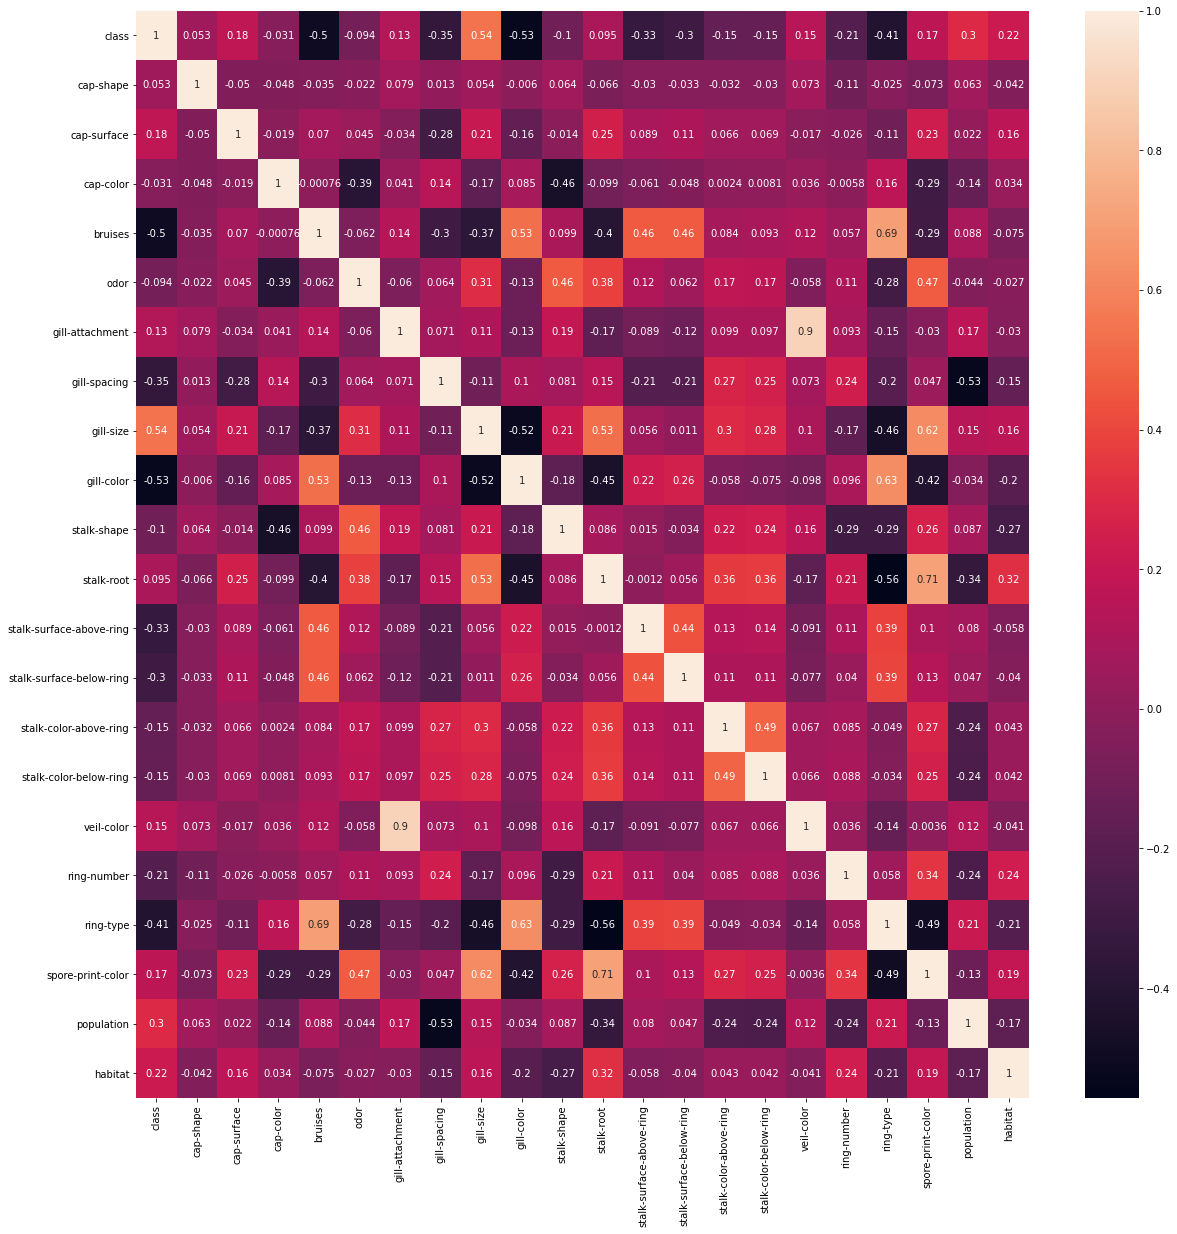

In [13]:
# sprawdzenie korelacji miedzy cechami a jadalnoscia grzyba

plt.figure(figsize=(20, 20))
sns.heatmap(df_le.corr(), annot=True);

In [14]:
# cechy wykazujace przynajmniej slaba korelacje
# (wartosc bezwzgledna wspolczynnika korelacji powyzej 0.25)

df_le.corr()[(df_le.corr()['class'] > 0.25) | (df_le.corr()['class'] < -0.25)].index

Index(['class', 'bruises', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type',
       'population'],
      dtype='object')

In [15]:
df_new = df_le[['class', 'bruises', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type',
       'population']]

df_new.head()

,class,bruises,gill-spacing,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,population
0,1,1,0,1,4,2,2,4,3
1,0,1,0,0,4,2,2,4,2
2,0,1,0,0,5,2,2,4,2
3,1,1,0,1,5,2,2,4,3
4,0,0,1,0,4,2,2,0,0


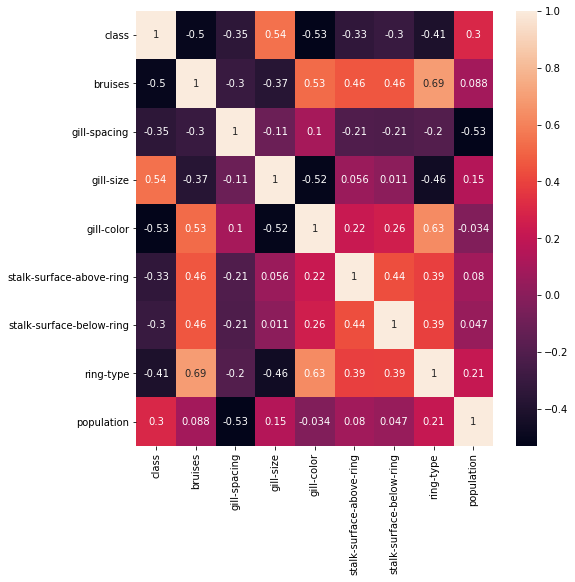

In [16]:
# sprawdzenie czy zredukowane cechy koreluja miedzy soba

plt.figure(figsize=(8, 8))
sns.heatmap(df_new.corr(), annot=True);

In [17]:
# zadna z cech nie wykazuje silnej korelacji z inna cecha,
# zatem finalnie otrzymujemy liste cech:

columns_new = list(df_new.columns)
columns_new

['class',
 'bruises',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'ring-type',
 'population']

# Finalna postać zbiorów

### Zbior po usunieciu kolumn o niskim wspolczynniku korelacji

In [18]:
columns_ohe = list(df_ohe.columns)
columns_ohe_1 = []

for col_ohe in columns_ohe:
    for col_new in columns_new:
        if col_new in col_ohe:
            columns_ohe_1.append(col_ohe)

columns_ohe_1

['class_e',
 'class_p',
 'bruises_f',
 'bruises_t',
 'gill-spacing_c',
 'gill-spacing_w',
 'gill-size_b',
 'gill-size_n',
 'gill-color_b',
 'gill-color_e',
 'gill-color_g',
 'gill-color_h',
 'gill-color_k',
 'gill-color_n',
 'gill-color_o',
 'gill-color_p',
 'gill-color_r',
 'gill-color_u',
 'gill-color_w',
 'gill-color_y',
 'stalk-surface-above-ring_f',
 'stalk-surface-above-ring_k',
 'stalk-surface-above-ring_s',
 'stalk-surface-above-ring_y',
 'stalk-surface-below-ring_f',
 'stalk-surface-below-ring_k',
 'stalk-surface-below-ring_s',
 'stalk-surface-below-ring_y',
 'ring-type_e',
 'ring-type_f',
 'ring-type_l',
 'ring-type_n',
 'ring-type_p',
 'population_a',
 'population_c',
 'population_n',
 'population_s',
 'population_v',
 'population_y']

In [19]:
df_label_encoded_1 = df_new

df_label_encoded_1.head()

,class,bruises,gill-spacing,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,population
0,1,1,0,1,4,2,2,4,3
1,0,1,0,0,4,2,2,4,2
2,0,1,0,0,5,2,2,4,2
3,1,1,0,1,5,2,2,4,3
4,0,0,1,0,4,2,2,0,0


In [20]:
df_one_hot_encoded_1 = df_ohe[columns_ohe_1]

df_one_hot_encoded_1.head()

,class_e,class_p,bruises_f,bruises_t,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,population_a,population_c,population_n,population_s,population_v,population_y
0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0


#### Export do csv

In [21]:
df_label_encoded_1.to_csv('label_encoded_corr.csv', index=False)
df_one_hot_encoded_1.to_csv('one_hot_encoded_corr.csv', index=False)

### Zbior po usunieciu kolumn o niskiej wariancji

In [22]:
df_label_encoded_2 = df_le.drop(columns_dropped, axis=1)

df_label_encoded_2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,0,1,4,0,2,2,2,7,7,4,2,3,5
1,0,5,2,9,1,0,0,0,4,0,1,2,2,7,7,4,3,2,1
2,0,0,2,8,1,3,0,0,5,0,1,2,2,7,7,4,3,2,3
3,1,5,3,8,1,6,0,1,5,0,2,2,2,7,7,4,2,3,5
4,0,5,2,3,0,5,1,0,4,1,2,2,2,7,7,0,3,0,1


In [23]:
columns_ohe = list(df_ohe.columns)
columns_ohe_2 = []

for col_ohe in columns_ohe:
    for col_new in columns_dropped:
        if col_new in col_ohe:
            columns_ohe_2.append(col_ohe)

columns_ohe_2

['gill-attachment_a',
 'gill-attachment_f',
 'veil-color_n',
 'veil-color_o',
 'veil-color_w',
 'veil-color_y',
 'ring-number_n',
 'ring-number_o',
 'ring-number_t']

In [24]:
df_one_hot_encoded_2 = df_ohe.drop(columns_ohe_2, axis=1)

df_one_hot_encoded_2.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_m,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


#### Export do csv

In [25]:
df_label_encoded_2.to_csv('label_encoded_var.csv', index=False)
df_one_hot_encoded_2.to_csv('one_hot_encoded_var.csv', index=False)